# Báo cáo đồ án môn "Lập trình song song ứng dụng"

Nhóm 5:
1. 1712718 - Huỳnh Thanh Sang - [GitHub](https://github.com/hts7117)
2. 1712683 - Phạm Hoàng Phương - [Github](https://github.com/superman19993)
3. 1712584 - Nguyễn Công Lý - [GitHub](https://github.com/conglyne222)

Link thùng chứa Github của nhóm: [Repo](https://github.com/superman19993/LTSSUD_1712718_1712683_1712584)


## Mô tả ứng dụng
  ### Object detection and Segmentation by Mask RCNN
  - Input: Ảnh đầu vào có kích thước W x H ![image.png](https://scontent.fsgn5-9.fna.fbcdn.net/v/t1.15752-9/277380635_662833644832542_6356397547685485335_n.jpg?_nc_cat=105&ccb=1-6&_nc_sid=ae9488&_nc_ohc=RBV_D7KGFtcAX-yCXgU&_nc_ht=scontent.fsgn5-9.fna&oh=03_AVIB-MIAm71Po3qz8YuewIS-pgMsgaE4hycSdBBq5lYzpw&oe=629E498B)
  - Output: Các bounding box: [cx, cy, w, h] (tọa độ tâm + kích thước) tại các vị trí nghi ngờ có cá thể ![image.png](https://scontent.fsgn5-3.fna.fbcdn.net/v/t1.15752-9/277262287_1207776213380954_9024006818679567261_n.jpg?_nc_cat=104&ccb=1-6&_nc_sid=ae9488&_nc_ohc=GZ5b3cepL64AX-jC-im&_nc_ht=scontent.fsgn5-3.fna&oh=03_AVL9lmjCMowwtTJ4Ws0N4Ywd2BHXzIyZR-pbXHZL2uQfnA&oe=629B4BBA)

  - Trong đề tài này, nhóm 5 lấy mô hình object detection and segmentation by Mask RCNN đã được huấn luyện từ trước để thực hiện tối ưu về thời gian chạy.
  - Mô hình trên được huấn luyện từ tập dữ liệu COCO (200.000 ảnh, 80 lớp, 1.500.000 cá thể).




  ### Lý do chọn đề tài: 
  - Bài toán sử dụng mạng CNN (liên quan đến tác vụ convolution trên ảnh).
  - Các tác vụ xử lý liên quan đến ảnh khác.

## Tổng quát về bài toán.



![image.png](https://scontent.fsgn5-2.fna.fbcdn.net/v/t1.15752-9/279651849_1165431594233833_7319179211099776832_n.png?_nc_cat=110&ccb=1-6&_nc_sid=ae9488&_nc_ohc=9Ja3PNyZpzkAX__dRcj&_nc_ht=scontent.fsgn5-2.fna&oh=03_AVJhK_8XEU4CD2x4VlIaoSBqIpSTX5d3JXq53zZ0622ocA&oe=629FB49F)



### Phát sinh ứng viên (Region Proposal)
- Đầu tiên các ảnh input đầu vào được đưa qua mạng rút trích đặc trưng Feature Pyramid Network (FPN*) để rút ra các feature map. Kích thước của feature map nhỏ hơn rất nhiều so với ảnh ban đầu, bù lại số channel tăng lên nên vẫn bảo toàn được thông tin cấu trúc ảnh.

![image.png](https://scontent.fsgn5-8.fna.fbcdn.net/v/t1.15752-9/279292201_5332166153502996_1418416441842780472_n.png?_nc_cat=109&ccb=1-6&_nc_sid=ae9488&_nc_ohc=rZkzpd5-AOgAX-BEfXM&tn=hWV3bc92ndaEf6Eh&_nc_ht=scontent.fsgn5-8.fna&oh=03_AVLd1VX1nX0Md5jHvqa5zcK7HAbHdNxNJZz2ZPa-kWTLQw&oe=629D2298)

(FPN*): là mô hình mạng được thiết kế ra để nâng cao độ chính xác đối với việc dò tìm các vật thể nhỏ.


- Sau đó sẽ duyệt trên từng ô của feature map một lần duy nhất, tại mỗi ô sẽ sinh ra k anchor box có kích thước cố định. Cách sinh anchor box này đảm bảo mô hình có thể nhận dạng được các cá thể thuộc mọi kích thước và hình dạng khác nhau.
- Minh họa anchor box k=9
![image.png](https://scontent.fsgn5-3.fna.fbcdn.net/v/t1.15752-9/277967659_2116324165207464_498970705263918862_n.png?_nc_cat=104&ccb=1-7&_nc_sid=ae9488&_nc_ohc=Trrp1vzc8LAAX-0OErH&_nc_oc=AQm8ZIQlhl1n6Ckh9RAy3zYuMVUxknwaVe6oMjx4PuXTxAscuNJxk8xfruSHFnW_RMY&_nc_ht=scontent.fsgn5-3.fna&oh=03_AVIjGqZSfrW6vM0qI2jG3BDEttiyYCwMNxQOheSjgtIPrg&oe=62B2E46A)


- Feature map đang xét sau đó được đưa vào RPN (Region Proposal Network) để kiểm tra từng anchor box có chứa vật thể không và tinh chỉnh anchor box đó. Những anchor box có chứa vật thể sẽ được làm bounding box ứng viên

![image.png](https://scontent.fsgn5-12.fna.fbcdn.net/v/t1.15752-9/278923162_1186205478811950_2237024756275600497_n.png?_nc_cat=102&ccb=1-6&_nc_sid=ae9488&_nc_ohc=98KtdUDP0UgAX9tuJ2L&_nc_ht=scontent.fsgn5-12.fna&oh=03_AVIdgzCMD6VWSMsmkhQrDZJr2SoXdQ8aYB9PLMAJmJQ4HQ&oe=629F81FF)

### Phân lớp (Classification)
- Sau đó các bounding box ứng viên sẽ được đưa qua ROI Align(*) để crop các feature map ở các ứng viên ra.

(*): ROI Align có cơ chế hoạt động tương tự với ROI pooling (Region of interest pooling) nhằm đảm bảo các feature map có kích thước cố định


- Phần feature map sau khi thực hiện ROIAlign sẽ được đưa vô một mạng fully-connected gồm 2 nhánh để tìm ra class id tương ứng với bounding box đầu vào và tinh chỉnh lại bounding box đầu vào để tăng độ chính xác. 



### Phân đoạn ảnh (Segmentation)
- Phần feature map có được từ bước trên sẽ được cho qua một 1 mạng Convolution với output có kích thước tổng số class x 28 x 28. Cuối cùng, lấy output thứ class_id (kết quả phân lớp) và resize lại cho kích thước ban đầu của bounding box ta được binary mask cần tìm.

![image.png](https://scontent.fsgn5-10.fna.fbcdn.net/v/t1.15752-9/276326941_805976757043351_2295426509047500211_n.png?_nc_cat=107&ccb=1-6&_nc_sid=ae9488&_nc_ohc=Jwo44j-VR5AAX9hwcTZ&_nc_ht=scontent.fsgn5-10.fna&oh=03_AVKgw9mR0To7QFYrVblZqi9VXz6W5YhB3ACyKcsOQGNhXw&oe=629D3395)

## Mask R-CNN inference stage
A quick intro to using the pre-trained model to detect and segment objects.

### Mount source code from Google Drive and choose tensorflow version

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd gdrive/MyDrive/LTSS_UD/

/content/gdrive/MyDrive/LTSS_UD


In [ ]:
%tensorflow_version 1.14.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14.0`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [ ]:
!cp saving.py /tensorflow-1.15.2/python3.7/keras/engine

### Inference stage tham khảo

In [ ]:
%%time
!python inference.py

Using TensorFlow backend.


2022-06-05 03:52:18.412404: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2022-06-05 03:52:18.412610: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x439bf80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-06-05 03:52:18.412642: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-06-05 03:52:18.414369: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-06-05 03:52:18.655224: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-05 03:52:18.655999: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x439c300 initialized for platform CUDA (this does not guarantee that XLA will be used). 

Populating the interactive namespace from numpy and matplotlib


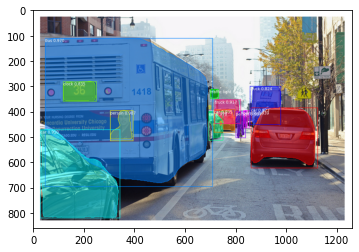

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('output.png')
imgplot = plt.imshow(img)
plt.show()

## Cách tuần tự bài toán của nhóm: 
![image.png](https://scontent.fsgn5-6.fna.fbcdn.net/v/t1.15752-9/277884162_514674246974652_5553281329308356279_n.png?_nc_cat=108&ccb=1-7&_nc_sid=ae9488&_nc_ohc=E2GTzQ1SP3MAX9eNgxN&_nc_ht=scontent.fsgn5-6.fna&oh=03_AVILZ71lDWM6saH2qWzBMIHm3d2DE4ijlmxxF6glYg0W7Q&oe=62B5321C)

- Nhóm chọn song song C1 trong bottom up của mạng FPN:
  
 - Trong bài toán gốc, tác giả sử dụng Keras Layer để build mô hình, sau đó ảnh input sẽ được tuần tự đi qua các layer mà tác giả đã sắp xếp sẵn.

 - Ý tưởng của nhóm là viết hàm xử lý tuần tự, rồi cho ảnh input qua hàm đó trước khi cho vào model của keras (trong Keras sẽ xoá các layer tương ứng mà nhóm đã viết hàm tuần tự).

 - Output của các hàm tự viết sẽ phải giống output của các layer Keras tương ứng.

### Sequential inference stage

In [ ]:
%%time
!python inference3.py

Using TensorFlow backend.


2022-06-04 02:07:49.247306: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2022-06-04 02:07:49.247496: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x6743f80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-06-04 02:07:49.247528: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-06-04 02:07:49.249305: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-06-04 02:07:49.486393: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-04 02:07:49.488841: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x6744300 initialized for platform CUDA (this does not guarantee that XLA will be used). 

Populating the interactive namespace from numpy and matplotlib


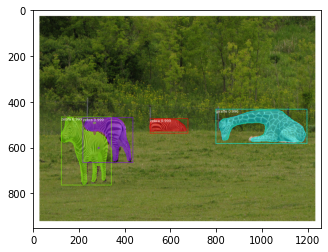

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('output_host_jit.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
!nvidia-smi

Sat Jun  4 02:10:00 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from numba import cuda
cuda.detect()

Found 1 CUDA devices
id 0             b'Tesla T4'                              [SUPPORTED]
                      compute capability: 7.5
                           pci device id: 4
                              pci bus id: 0
Summary:
	1/1 devices are supported


True

In [ ]:
%%time
!python parallel1.py

Using TensorFlow backend.


2022-06-05 03:59:25.676745: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2022-06-05 03:59:25.676965: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x487bf80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-06-05 03:59:25.676997: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-06-05 03:59:25.678652: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-06-05 03:59:25.911351: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-05 03:59:25.912111: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x487c300 initialized for platform CUDA (this does not guarantee that XLA will be used). 

In [ ]:
!nvprof --print-gpu-trace python parallel1.py

Using TensorFlow backend.


2022-06-06 04:28:09.463851: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2022-06-06 04:28:09.464042: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5fb5dc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-06-06 04:28:09.464074: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-06-06 04:28:09.465830: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
==1153== NVPROF is profiling process 1153, command: python3 parallel1.py
2022-06-06 04:28:09.912123: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 04:28:09.912921: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5fb5880 initia

In [ ]:
%%time
!python parallel2.py

Using TensorFlow backend.


2022-06-05 04:01:35.688296: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2022-06-05 04:01:35.688504: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x511df80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-06-05 04:01:35.688536: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-06-05 04:01:35.690218: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-06-05 04:01:35.931327: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-05 04:01:35.932129: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x511e300 initialized for platform CUDA (this does not guarantee that XLA will be used). 

In [ ]:
!nvprof --print-gpu-trace python parallel2.py

Using TensorFlow backend.


2022-06-06 03:10:59.659232: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2022-06-06 03:10:59.659519: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x6e34fc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-06-06 03:10:59.659557: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-06-06 03:10:59.664018: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
==499== NVPROF is profiling process 499, command: python3 parallel2.py
2022-06-06 03:11:00.225486: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 03:11:00.226371: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x6e35180 initiali

### Architecture of C1 in ResNet


*   Zeropadding
*   Conv2d
*   Batchnorm
*   Relu activation
*   Padding for maxpooling
*   Maxpooling

4. ReLu Activation (Rectified Linear Unit):
-  Công thức: f(x) = max(x,0)
-  ReLU là hàm kích hoạt trong Neural Network, với chức năng lọc các giá trị < 0. Giá trị được trả ra là 0 nếu đầu vào nhỏ hơn 0, nếu giá trị > 0 thì giá trị sẽ được giữ nguyên

<br>

5. Max Pooling
-  Lớp Pooling làm giảm các tham số khi kích thước ảnh quá lớn. Trong các pooling, Max Pooling là một loại phổ biến, dùng để làm giảm số feature của ảnh đầu vào thông qua việc lấy phần từ lớn nhất của ma trận đối tượng.

-  Ví dụ: Ta có input với kích thước 4x2. Để filter giảm các tham số cho ra output là 2x2 với bước nhảy (Stride - (2,2)), ta lấy ra giá trị lớn nhất trong một ma trận đối tượng với kích thước 2x2: Trong ma trận top left, ta giá trị lớn nhất là 9; tương tự là 7,8,6 tương ứng các ma trận top right, bot left, bot right.
![image.png](https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png)

<br>

6. Padding for Max Pooling
-  Trong các trường hợp ảnh input có kích thước không fit với kích thước kernel và stride của pooling layer. Padding trong Max Pooling được áp dụng để xử lý kích thước ảnh sao cho phù hợp và fit với kích thước của kernel.

- Ví dụ: Khi input có kích thước 5x5, tuy nhiên output trả ra có kích thước là 2x2 và kernel có kích thước là 2x2, ta phải thêm các padding vào input để cho ra kích thước phù hợp
 
 ![image.png](https://i.stack.imgur.com/NFQKa.jpg)
